In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [ ]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown
 98% 169M/172M [00:02<00:00, 67.1MB/s]
100% 172M/172M [00:02<00:00, 62.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/bone-fracture-detection-using-xrays.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

<ipython-input-4-36398ed231ac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import PIL
import PIL.Image

In [ ]:
test_loc='/content/archive (6)/val'
train_loc='/content/archive (6)/train'

In [ ]:
#dataset loader
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)


test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 8863 files belonging to 2 classes.
Using 7091 files for training.
Found 600 files belonging to 2 classes.


In [ ]:
for images,labels in train_dataset.take(1):

    random_idx=random.randint(0,batch_size-1)

    random_image=images[random_idx]
    random_label=labels[random_idx]

    plt.imshow(random_image.numpy().astype("uint8"))
    plt.title(random_label.numpy())
    plt.show()


In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.6462

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 80s 296ms/step - loss: 0.6718 - accuracy: 0.6462 - val_loss: 0.7322 - val_accuracy: 0.5564
Epoch 2/30
222/222 [==============================] - 50s 226ms/step - loss: 0.5351 - accuracy: 0.7270 - val_loss: 0.7353 - val_accuracy: 0.5672
Epoch 3/30
222/222 [==============================] - 49s 221ms/step - loss: 0.4783 - accuracy: 0.7656 - val_loss: 0.8267 - val_accuracy: 0.5423
Epoch 4/30
222/222 [==============================] - 49s 220ms/step - loss: 0.4514 - accuracy: 0.7854 - val_loss: 0.8851 - val_accuracy: 0.5344
Epoch 5/30
222/222 [==============================] - 50s 226ms/step - loss: 0.4226 - accuracy: 0.8040 - val_loss: 0.7964 - val_accuracy: 0.5705
Epoch 6/30
222/222 [==============================] - 48s 218ms/step - loss: 0.4134 - accuracy: 0.8023 - val_loss: 0.9361 - val_accuracy: 0.5965
Epoch 7/30
222/222 [==============================] - 50s 225ms/step - loss: 0.3756 - accuracy: 0.8306 - val_loss: 0.7897 - val_accuracy: 0.6

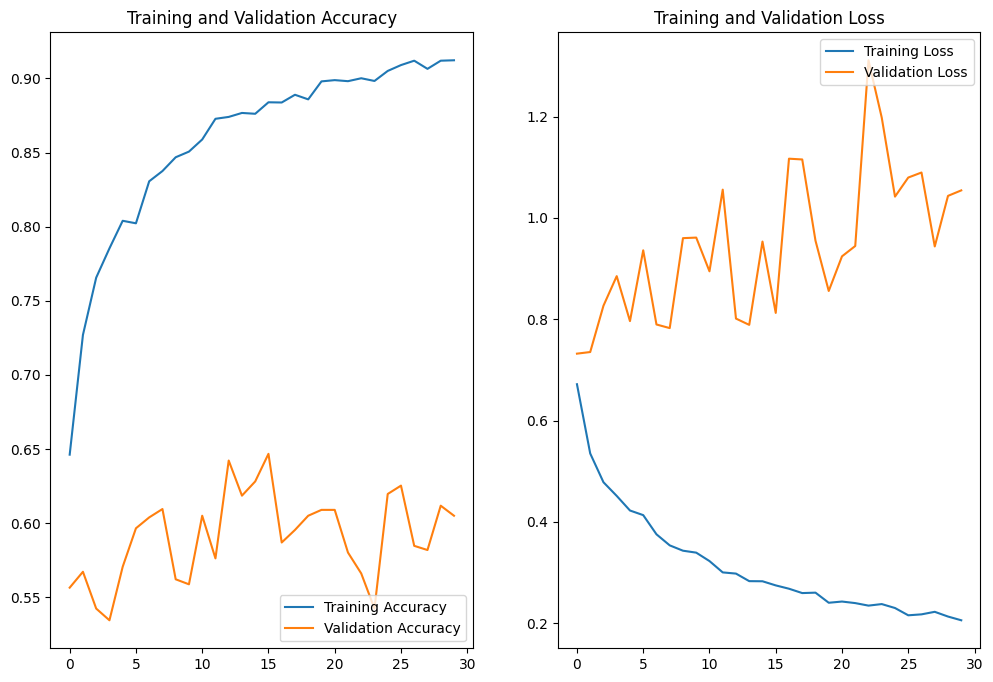

56/56 [==============================] - 11s 165ms/step
               precision    recall  f1-score   support

    fractured       0.51      0.57      0.54       896
not fractured       0.50      0.43      0.46       876

     accuracy                           0.51      1772
    macro avg       0.50      0.50      0.50      1772
 weighted avg       0.50      0.51      0.50      1772



In [ ]:
#Inception v3 - googlenet
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_googlenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = InceptionV3(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_googlenet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


Found 7091 images belonging to 2 classes.
Found 1772 images belonging to 2 classes.
29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/30
222/222 [==============================] - ETA: 0s - loss: 0.5383 - accuracy: 0.7263

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


222/222 [==============================] - 74s 263ms/step - loss: 0.5383 - accuracy: 0.7263 - val_loss: 0.8590 - val_accuracy: 0.5435
Epoch 2/30
222/222 [==============================] - 52s 235ms/step - loss: 0.3731 - accuracy: 0.8332 - val_loss: 0.7478 - val_accuracy: 0.6225
Epoch 3/30
222/222 [==============================] - 52s 235ms/step - loss: 0.3111 - accuracy: 0.8667 - val_loss: 0.8626 - val_accuracy: 0.6129
Epoch 4/30
222/222 [==============================] - 51s 231ms/step - loss: 0.2500 - accuracy: 0.8930 - val_loss: 1.1071 - val_accuracy: 0.5322
Epoch 5/30
222/222 [==============================] - 50s 227ms/step - loss: 0.2100 - accuracy: 0.9150 - val_loss: 0.9732 - val_accuracy: 0.5926
Epoch 6/30
222/222 [==============================] - 51s 228ms/step - loss: 0.1810 - accuracy: 0.9291 - val_loss: 1.0043 - val_accuracy: 0.6157
Epoch 7/30
222/222 [==============================] - 50s 225ms/step - loss: 0.1612 - accuracy: 0.9377 - val_loss: 1.1154 - val_accuracy: 0.5

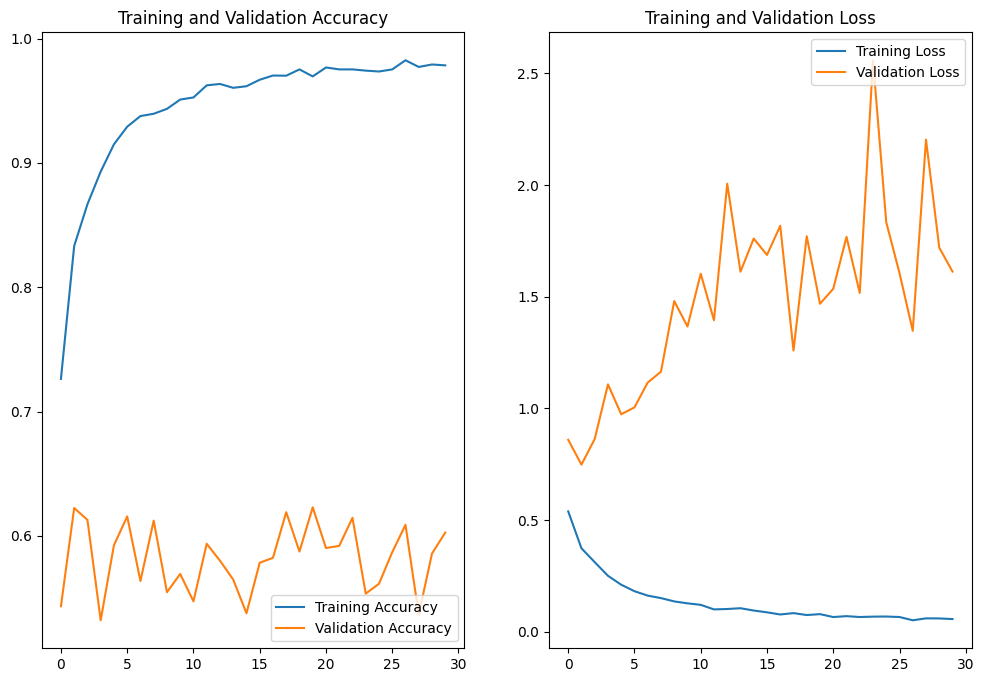

56/56 [==============================] - 12s 178ms/step
               precision    recall  f1-score   support

    fractured       0.50      0.61      0.55       896
not fractured       0.49      0.38      0.43       876

     accuracy                           0.50      1772
    macro avg       0.50      0.50      0.49      1772
 weighted avg       0.50      0.50      0.49      1772



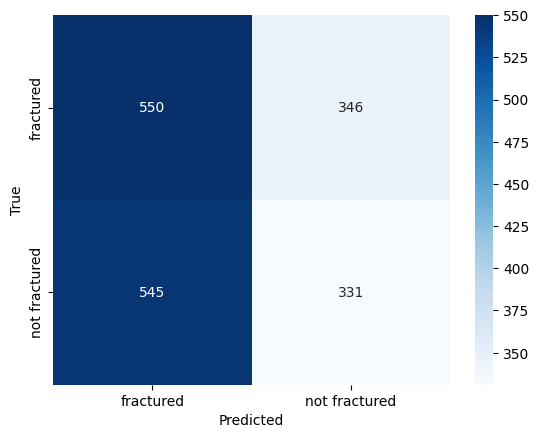

In [ ]:
#Densetnet21
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, LayerNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import DenseNet121

def load_data(train_dir, validation_dir, image_size=(128, 128), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )

    return train_generator, validation_generator

def build_densenet_model(input_shape=(128, 128, 3), num_classes=1):
    base_model = DenseNet121(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def train_model(model, train_generator, validation_generator, epochs=30):
    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[checkpoint]
    )

    return history

def evaluate_model(model, validation_generator):
    validation_generator.reset()
    predictions = model.predict(validation_generator)
    y_pred = (predictions > 0.5).astype(int)
    y_true = validation_generator.classes

    print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def main():
    train_dir = '/content/archive (6)/train'
    validation_dir = '/content/archive (6)/val'

    train_generator, validation_generator = load_data(train_dir, validation_dir)
    model = build_densenet_model()

    epochs = 30
    history = train_model(model, train_generator, validation_generator, epochs=epochs)

    plot_metrics(history)

    evaluate_model(model, validation_generator)

if __name__ == "__main__":
    main()


In [ ]:
pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.8 MB/s eta 0:00:00
